## AWS EC2 with Boto3 Python Tutorial 

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html

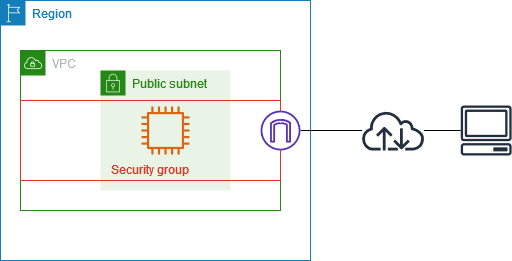

Amazon Elastic Compute Cloud (Amazon EC2) is a web service that provides resizeable computing capacity in servers in Amazon's data centers—that you use to build and host your software systems.

## Start, Stop and Delete Amazon EC2 instances

In [ ]:
import boto3

ec2 = boto3.client('ec2', region_name='us-east-1')

response = ec2.describe_instances()

# instance_name = "mlops-kgptalkie"
instance_name = "mlops-prod"
instance_id="" 

for resp in response['Reservations']:
    resp = resp['Instances'][0]
    tags = resp.get('Tags', [])
    
    for tag in tags:
        if tag.get("Key", "")=="Name" and tag.get("Value", "")==instance_name:
            instance_id = resp['InstanceId']

if instance_id=="":
    print(f"No instance found with name {instance_name}")
    raise("Stop here!!!")

instance_id

NoRegionError: You must specify a region.

In [3]:
# status -> running, stopped, terminated, pending etc.

import time

def wait_for_status(instance_id, target_status):
    while True:
        response = ec2.describe_instances(InstanceIds=instance_id)

        status = response['Reservations'][0]['Instances'][0]['State']['Name']

        if status == target_status:
            print("Instance is in {} state".format(target_status))
            break
        
        time.sleep(10)


In [3]:
def stop_instances(instance_id):
    print("EC2 Instance Stop")
    ec2.stop_instances(InstanceIds=instance_id)

    wait_for_status(instance_id, 'stopped')

stop_instances([instance_id])

EC2 Instance Stop
Instance is in stopped state


In [4]:
def start_instances(instance_id):
    print("EC2 Instance Start")
    ec2.start_instances(InstanceIds=instance_id)

    wait_for_status(instance_id, 'running')

start_instances([instance_id])

response = ec2.describe_instances(InstanceIds=[instance_id])
public_ip = response['Reservations'][0]['Instances'][0]['PublicIpAddress']
public_ip

EC2 Instance Start
Instance is in running state


'54.163.207.194'